Der Demodatensatz d_kunde ist künstlich erzeugt, um Effekte besonders gut herauszustellen. Für die folgenden Attribute gelten z. B. diese Regeln:

Ein Kunde ist ein GEHOBENER_PREIS_KUNDE (Wert auf 1) 
wenn 
        WOHNART_NR 	   	   12 – 16    ( Level von 1 - 16 aufsteigend) 
        BILDUNGS_NR 	 	6 – 11     ( Level von 1 - 11 aufsteigend) 
        EINKOMMENSGRUPPE 	 5 – 9     ( Level von 1 -  9 aufsteigend) 


In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
import pandas as pd
kunden = pd.read_csv("D:/Python/datasets/d_kunde.csv", sep=",", encoding = "ISO-8859-1")
#print(kunden.head())
print(kunden.columns)
# Test mit:
# Input-Variablen: WOHNART_NR, BILDUNGS_NR , EINKOMMENSGRUPPEN_NR
# Ziel-Variable:   GEHOBENER_PREIS_KUNDE (0,1)

Index(['0', 'KUNDEN_NR', 'KD_GRUPPEN_NR', 'VORNAME', 'NACHNAME', 'ANREDE',
       'LEBENSALTER', 'GESCHLECHT', 'STAND', 'WOHNART_NR', 'BILDUNGS_NR',
       'GEHALT', 'BERUFSGRUPPEN_NR', 'EIGENTUM', 'ANZ_KINDER', 'BERUF_NR',
       'KRITISCHER_KUNDE', 'SPONTANER_KUNDE', 'LFD_ORT_NR', 'ORT_NR', 'PLZ',
       'LON', 'LAT', 'ORT', 'ANZAHL_KAEUFE_JAHR', 'UMSATZ_JAHR', 'UMSATZ',
       'BILDUNG', 'BERUF', 'WOHNART', 'BERUFSGRUPPE', 'EINKOMMENSGRUPPEN_NR',
       'EINKOMMENSGRUPPE', 'BONITAET', 'KREDITFAEHIG', 'SCHNAEPPCHENJAEGER',
       'GEHOBENER_PREIS_KUNDE', 'NIEDRIG_PREIS_KUNDE', 'KUNDENTYP',
       'BERUFSKLASSE', 'ANZAHL_WERBUNG_MONAT', 'FREQUENZ_BESUCHE_MONAT',
       'Gen_Datum'],
      dtype='object')


In [3]:
# Input-Variablen
X = kunden.loc[:,['WOHNART_NR','BILDUNGS_NR','EINKOMMENSGRUPPEN_NR']]
# Zielvariable
y  = kunden.GEHOBENER_PREIS_KUNDE
y.unique()

array([0, 1], dtype=int64)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)

In [5]:
baum = DecisionTreeClassifier(random_state=0)
baum.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(baum.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(baum.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [6]:
from sklearn.tree import export_graphviz
export_graphviz(baum, out_file="tree.dot", class_names=["GEHOBENER_PREIS_KUNDE_nein","GEHOBENER_PREIS_KUNDE_ja"],
                feature_names=X.columns, impurity=False, filled=True)

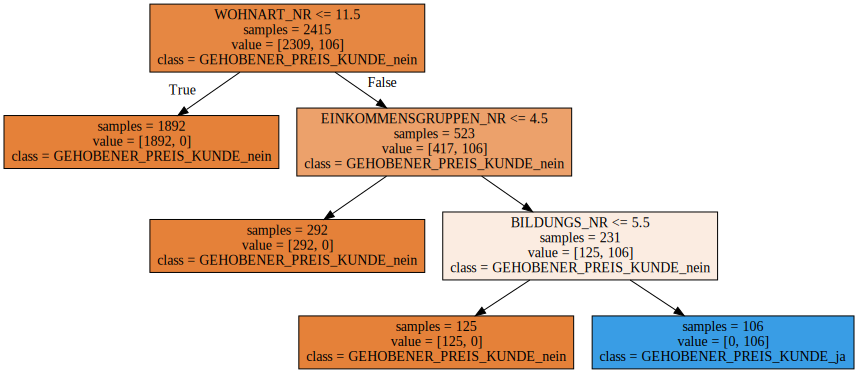

In [7]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

Erweitern der Analyse auf weitere Attribute

In [5]:
#kunden.columns

In [8]:
# Input-Variablen
X = kunden.loc[:,['LEBENSALTER','ANZ_KINDER','WOHNART_NR','BILDUNGS_NR','EINKOMMENSGRUPPEN_NR']]
# Zielvariable
y  = kunden.GEHOBENER_PREIS_KUNDE
y.unique()

array([0, 1], dtype=int64)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)
baum = DecisionTreeClassifier(random_state=0)
baum.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(baum.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(baum.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


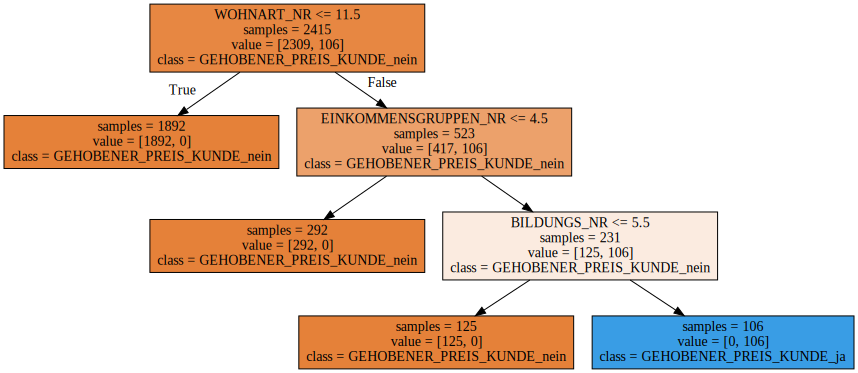

In [19]:
from sklearn.tree import export_graphviz
export_graphviz(baum, out_file="tree.dot", class_names=["GEHOBENER_PREIS_KUNDE_nein","GEHOBENER_PREIS_KUNDE_ja"],
                feature_names=X.columns, impurity=False, filled=True)
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [20]:
used_attributes = pd.DataFrame(baum.feature_importances_, X.columns )
print(used_attributes)

                             0
LEBENSALTER           0.000000
ANZ_KINDER            0.000000
WOHNART_NR            0.166074
BILDUNGS_NR           0.565967
EINKOMMENSGRUPPEN_NR  0.267959
